In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
fd = pd.read_csv('/content/drive/MyDrive/Fraudulent_E-Commerce_Transaction_Data.csv')

In [4]:
fd.head()

Transaction ID                           Customer ID  \
0  15d2e414-8735-46fc-9e02-80b472b2580f  d1b87f62-51b2-493b-ad6a-77e0fe13e785   
1  0bfee1a0-6d5e-40da-a446-d04e73b1b177  37de64d5-e901-4a56-9ea0-af0c24c069cf   
2  e588eef4-b754-468e-9d90-d0e0abfc1af0  1bac88d6-4b22-409a-a06b-425119c57225   
3  4de46e52-60c3-49d9-be39-636681009789  2357c76e-9253-4ceb-b44e-ef4b71cb7d4d   
4  074a76de-fe2d-443e-a00c-f044cdb68e21  45071bc5-9588-43ea-8093-023caec8ea1c   

   Transaction Amount     Transaction Date Payment Method Product Category  \
0               58.09  2024-02-20 05:58:41  bank transfer      electronics   
1              389.96  2024-02-25 08:09:45     debit card      electronics   
2              134.19  2024-03-18 03:42:55         PayPal    home & garden   
3              226.17  2024-03-16 20:41:31  bank transfer         clothing   
4              121.53  2024-01-15 05:08:17  bank transfer         clothing   

   Quantity  Customer Age Customer Location Device Used       IP Address  \
0         1            17     Amandaborough      tablet   212.195.49.198   
1         2            40      East Timothy     desktop  208.106.249.121   
2         2            22        Davismouth      tablet     76.63.88.212   
3         5            31          Lynnberg     desktop   207.208.171.73   
4         2            51      South Nicole      tablet   190.172.14.169   

                                    Shipping Address  \
0                   Unit 8934 Box 0058\nDPO AA 05437   
1            634 May Keys\nPort Cherylview, NV 75063   
2    16282 Dana Falls Suite 790\nRothhaven, IL 15564   
3     828 Strong Loaf Apt. 646\nNew Joshua, UT 84798   
4  29799 Jason Hills Apt. 439\nWest Richardtown, ...   

                                     Billing Address  Is Fraudulent  \
0                   Unit 8934 Box 0058\nDPO AA 05437              0   
1            634 May Keys\nPort Cherylview, NV 75063              0   
2    16282 Dana Falls Suite 790\nRothhaven, IL 15564              0   
3     828 Strong Loaf Apt. 646\nNew Joshua, UT 84798              0   
4  29799 Jason Hills Apt. 439\nWest Richardtown, ...              0   

   Account Age Days  Transaction Hour  
0                30                 5  
1                72                 8  
2                63                 3  
3               124                20  
4               158                 5

In [5]:
fd.shape

(1472952, 16)

In [6]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472952 entries, 0 to 1472951
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Transaction ID      1472952 non-null  object 
 1   Customer ID         1472952 non-null  object 
 2   Transaction Amount  1472952 non-null  float64
 3   Transaction Date    1472952 non-null  object 
 4   Payment Method      1472952 non-null  object 
 5   Product Category    1472952 non-null  object 
 6   Quantity            1472952 non-null  int64  
 7   Customer Age        1472952 non-null  int64  
 8   Customer Location   1472952 non-null  object 
 9   Device Used         1472952 non-null  object 
 10  IP Address          1472952 non-null  object 
 11  Shipping Address    1472952 non-null  object 
 12  Billing Address     1472952 non-null  object 
 13  Is Fraudulent       1472952 non-null  int64  
 14  Account Age Days    1472952 non-null  int64  
 15  Transaction Hou

In [7]:
# Check outlier
fd.describe().T

count        mean         std   min    25%     50%  \
Transaction Amount  1472952.0  226.768309  270.395099  10.0  68.61  151.76   
Quantity            1472952.0    3.000230    1.414736   1.0   2.00    3.00   
Customer Age        1472952.0   34.512081   10.003134 -16.0  28.00   35.00   
Is Fraudulent       1472952.0    0.050129    0.218212   0.0   0.00    0.00   
Account Age Days    1472952.0  179.646398  106.864223   1.0  86.00  179.00   
Transaction Hour    1472952.0   11.286964    6.975995   0.0   5.00   11.00   

                       75%       max  
Transaction Amount  296.05  12701.75  
Quantity              4.00      5.00  
Customer Age         41.00     86.00  
Is Fraudulent         0.00      1.00  
Account Age Days    272.00    365.00  
Transaction Hour     17.00     23.00

*   There are outliers in Customer Age
*   Since the minimum value for Customer Age is -16

In [8]:
# Check missing value
fd.isnull().sum()

Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64

No missing value

In [9]:
fd.describe(include="O")

Transaction ID  \
count                                1472952   
unique                               1472952   
top     15d2e414-8735-46fc-9e02-80b472b2580f   
freq                                       1   

                                 Customer ID     Transaction Date  \
count                                1472952              1472952   
unique                               1472952              1346684   
top     d1b87f62-51b2-493b-ad6a-77e0fe13e785  2024-01-27 04:00:16   
freq                                       1                    6   

       Payment Method Product Category Customer Location Device Used  \
count         1472952          1472952           1472952     1472952   
unique              4                5             99135           3   
top       credit card  health & beauty       New Michael      mobile   
freq           368429           295367              1258      491743   

             IP Address           Shipping Address             Billing Address  
count           1472952                    1472952                     1472952  
unique          1472651                    1472948                     1472949  
top     170.118.178.249  USS Sanchez\nFPO AE 14652  USCGC Holmes\nFPO AA 56289  
freq                  2                          2                           2

In [10]:
# Check duplicated value
fd.duplicated().sum()

0

No duplicated value

In [11]:
px.box(data_frame=fd,x="Customer Age",width=500,height=300)

In [12]:
def clean_data(fd) -> pd.DataFrame:
    # Fix Customer Column
    '''
    Lower boundary of the customer age is 9
    Replace values between -9 and 8 with the mean
    Replace values less than -9 with absolute values
    '''
    mean_value = np.round(fd['Customer Age'].mean(),0)
    fd['Customer Age'] = np.where(fd['Customer Age'] <= -9,
                                    np.abs(fd['Customer Age']),
                                    fd['Customer Age'])

    fd['Customer Age'] = np.where(fd['Customer Age'] < 9,
                                    mean_value,
                                    fd['Customer Age'])

    # Convert data type of Transaction Date
    fd["Transaction Date"] = pd.to_datetime(fd["Transaction Date"])

    # Extract Day, Day of Week, and Month from Transaction Date
    fd['Transaction Day'] = fd["Transaction Date"].dt.day
    fd["Transaction DOW"] = fd["Transaction Date"].dt.day_of_week
    fd["Transaction Month"] = fd["Transaction Date"].dt.month

    # Create new column to determine if Shipping Address mathces Billing Address
    fd["Is Address Match"] = (fd["Shipping Address"] == fd["Billing Address"]).astype(int)

     # Remove irrelevant features
    fd.drop(columns=["Transaction ID", "Customer ID", "Customer Location",
                     "IP Address", "Transaction Date","Shipping Address","Billing Address"], inplace=True)

    # Downcast datatype to reduce dataset size
    int_col = fd.select_dtypes(include="int").columns
    float_col = fd.select_dtypes(include="float").columns

    fd[int_col] = fd[int_col].apply(pd.to_numeric, downcast='integer')
    fd[float_col] = fd[float_col].apply(pd.to_numeric, downcast='float')

    return fd

In [13]:
# Clean dataset
fd = clean_data(fd)

RESULTS

In [14]:
fd.head()

Transaction Amount Payment Method Product Category  Quantity  Customer Age  \
0           58.090000  bank transfer      electronics         1          17.0   
1          389.959991     debit card      electronics         2          40.0   
2          134.190002         PayPal    home & garden         2          22.0   
3          226.169998  bank transfer         clothing         5          31.0   
4          121.529999  bank transfer         clothing         2          51.0   

  Device Used  Is Fraudulent  Account Age Days  Transaction Hour  \
0      tablet              0                30                 5   
1     desktop              0                72                 8   
2      tablet              0                63                 3   
3     desktop              0               124                20   
4      tablet              0               158                 5   

   Transaction Day  Transaction DOW  Transaction Month  Is Address Match  
0               20                1                  2                 1  
1               25                6                  2                 1  
2               18                0                  3                 1  
3               16                5                  3                 1  
4               15                0                  1                 1

In [15]:
fd.shape

(1472952, 13)

In [16]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472952 entries, 0 to 1472951
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Transaction Amount  1472952 non-null  float32
 1   Payment Method      1472952 non-null  object 
 2   Product Category    1472952 non-null  object 
 3   Quantity            1472952 non-null  int8   
 4   Customer Age        1472952 non-null  float32
 5   Device Used         1472952 non-null  object 
 6   Is Fraudulent       1472952 non-null  int8   
 7   Account Age Days    1472952 non-null  int16  
 8   Transaction Hour    1472952 non-null  int8   
 9   Transaction Day     1472952 non-null  int8   
 10  Transaction DOW     1472952 non-null  int8   
 11  Transaction Month   1472952 non-null  int8   
 12  Is Address Match    1472952 non-null  int8   
dtypes: float32(2), int16(1), int8(7), object(3)
memory usage: 57.6+ MB


In [17]:
fd.describe().T

count        mean         std   min        25%  \
Transaction Amount  1472952.0  226.768250  270.247833  10.0  68.610001   
Quantity            1472952.0    3.000230    1.414736   1.0   2.000000   
Customer Age        1472952.0   34.650406    9.796759   9.0  28.000000   
Is Fraudulent       1472952.0    0.050129    0.218212   0.0   0.000000   
Account Age Days    1472952.0  179.646398  106.864223   1.0  86.000000   
Transaction Hour    1472952.0   11.286964    6.975995   0.0   5.000000   
Transaction Day     1472952.0   15.331927    8.938388   1.0   7.000000   
Transaction DOW     1472952.0    2.946404    2.009459   0.0   1.000000   
Transaction Month   1472952.0    2.050155    0.872739   1.0   1.000000   
Is Address Match    1472952.0    0.899845    0.300206   0.0   1.000000   

                           50%         75%       max  
Transaction Amount  151.759995  296.049988  12701.75  
Quantity              3.000000    4.000000      5.00  
Customer Age         35.000000   41.000000     86.00  
Is Fraudulent         0.000000    0.000000      1.00  
Account Age Days    179.000000  272.000000    365.00  
Transaction Hour     11.000000   17.000000     23.00  
Transaction Day      15.000000   23.000000     31.00  
Transaction DOW       3.000000    5.000000      6.00  
Transaction Month     2.000000    3.000000      4.00  
Is Address Match      1.000000    1.000000      1.00

DATA UNDERSTANDING

<Axes: xlabel='Transaction Amount', ylabel='Count'>

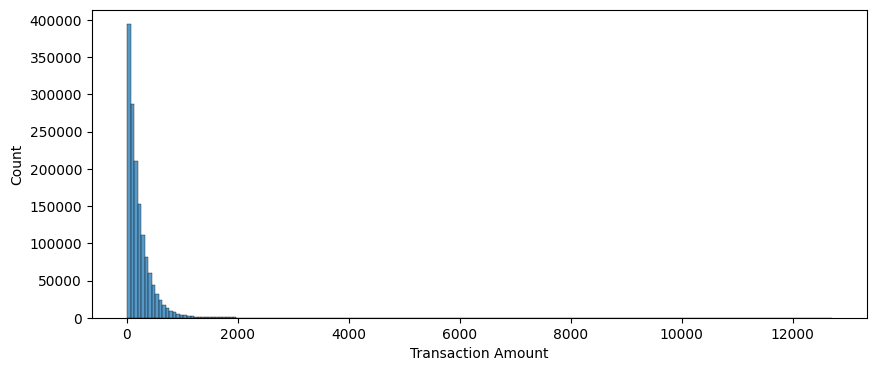

In [18]:
plt.figure(figsize=(10,4))
sns.histplot(fd["Transaction Amount"],bins=200)

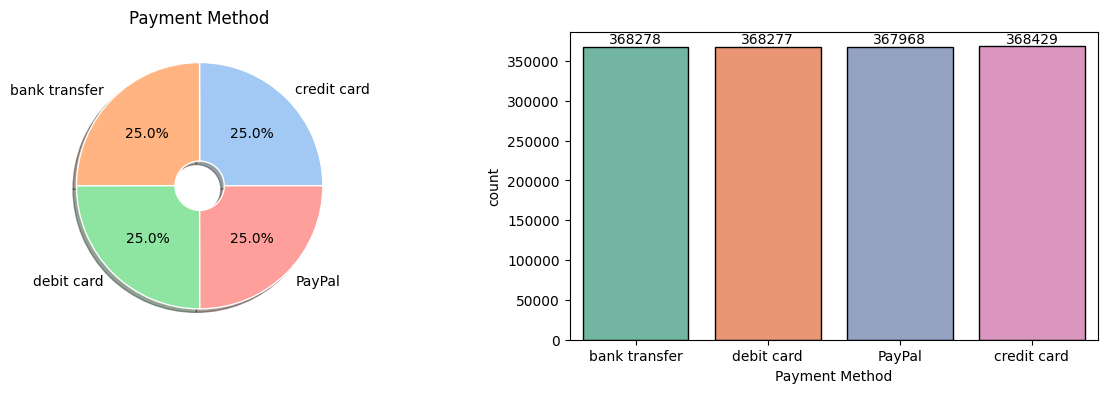

In [19]:
payment_count = fd["Payment Method"].value_counts()
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.set_palette('pastel')
colors = sns.color_palette()
plt.pie(payment_count,labels = payment_count.index,shadow=True,autopct='%1.1f%%',
        colors=colors,
        wedgeprops=dict(width=0.8,edgecolor="w"))
plt.title("Payment Method")

plt.subplot(1,2,2)

ax = sns.countplot(data=fd,x="Payment Method",edgecolor="black",linewidth=1, palette="Set2")
for container in ax.containers:
    ax.bar_label(container)

<Axes: xlabel='Customer Age', ylabel='Count'>

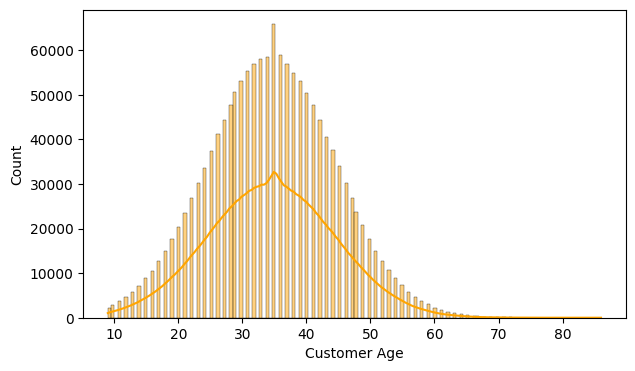

In [20]:
plt.figure(figsize=(7,4))
sns.histplot(data=fd, x="Customer Age",bins=150,kde=True,color='orange')

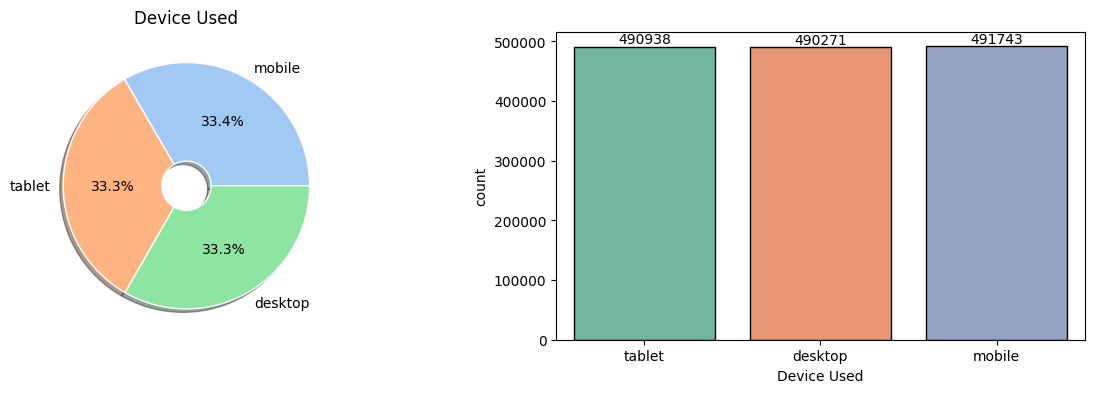

In [21]:
device_count = fd["Device Used"].value_counts()
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.set_palette('pastel')
colors = sns.color_palette()
plt.pie(device_count,labels = device_count.index,shadow=True,autopct='%1.1f%%',
        colors=colors,
        wedgeprops=dict(width=0.8,edgecolor="w"))
plt.title("Device Used")

plt.subplot(1,2,2)

ax = sns.countplot(data=fd,x="Device Used",edgecolor="black",linewidth=1, palette="Set2")
for container in ax.containers:
    ax.bar_label(container)

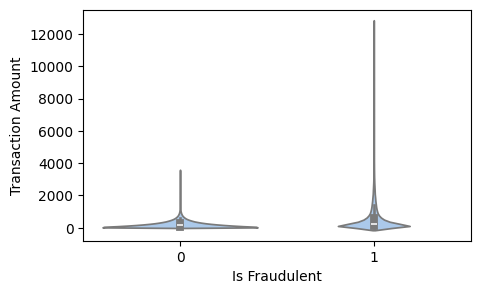

In [22]:
plt.figure(figsize=(5,3))
sns.violinplot(data=fd, x='Is Fraudulent', y='Transaction Amount')
plt.show()

MODEL BUILDING

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [24]:
X = fd.drop('Is Fraudulent', axis=1)
y = fd['Is Fraudulent']

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Check the data size to determine data imbalance
print(y_train.value_counts())
print(y_test.value_counts())

Is Fraudulent
0    1119285
1      59076
Name: count, dtype: int64
Is Fraudulent
0    279829
1     14762
Name: count, dtype: int64


In [26]:
# One-hot encode categorical columns
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [27]:
# Handling imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

In [28]:
# Handling imbalanced data using undersampling
X_train_under, y_train_under = RandomUnderSampler(random_state=42).fit_resample(X_train, y_train)
X_test_under, y_test_under = RandomUnderSampler(random_state=42).fit_resample(X_test, y_test)

In [29]:
# After SMOTE
print(y_train_smote.value_counts())
print(y_test_smote.value_counts())

Is Fraudulent
0    1119285
1    1119285
Name: count, dtype: int64
Is Fraudulent
0    279829
1    279829
Name: count, dtype: int64


In [30]:
# After undersampling
print(y_train_under.value_counts())
print(y_test_under.value_counts())

Is Fraudulent
0    59076
1    59076
Name: count, dtype: int64
Is Fraudulent
0    14762
1    14762
Name: count, dtype: int64


In [31]:
# XGBoost Classifier
xgb_model = XGBClassifier(objective="binary:logistic", eval_metric="logloss", use_label_encoder=False, random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)

# Function to evaluate the XGBoost model
print("\nXGBoost Classifier:")
y_pred = xgb_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


XGBoost Classifier:
Accuracy: 0.9483
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    279829
           1       0.47      0.27      0.34     14762

    accuracy                           0.95    294591
   macro avg       0.72      0.63      0.66    294591
weighted avg       0.94      0.95      0.94    294591



In [32]:
import pickle
pickle.dump(xgb_model, open('xgboost_model.pkl', 'wb'))